In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [2]:
# Load dataset
data=pd.read_csv(r'C:\Users\VIJAY\Downloads\index (1).csv')

In [3]:
data.head()

date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte

In [4]:
data.shape

(1133, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
data.describe()

money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000

In [7]:
data.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [8]:
#check null values
data.isnull().sum()
# Visualize null values

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
# fill null values
miss_values={
    'card':'unknown',
}
data.fillna(miss_values, inplace=True)


In [10]:
data.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [11]:
data.head()

date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte

In [12]:
# 1. Count how many times each coffee appears
coffee_counts = data['coffee_name'].value_counts()

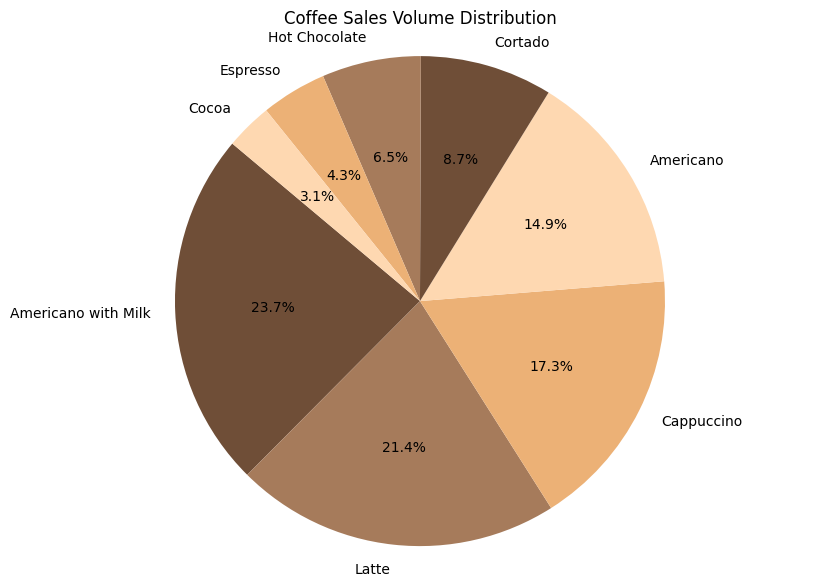

In [13]:
# 2. Create the plot
plt.figure(figsize=(10, 7))
plt.pie(coffee_counts, 
        labels=coffee_counts.index, 
        autopct='%1.1f%%', # Shows the percentage
        startangle=140, 
        colors=['#6F4E37', '#A67B5B', '#ECB176', '#FED8B1']) # Coffee-themed colors

plt.title('Coffee Sales Volume Distribution')
plt.axis('equal') # Ensures the pie is a circle
plt.show()

In [14]:
# 1. Convert the 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

In [15]:
# 2. Group by 'date' to get the total money earned per day
daily_sales = data.groupby('date')['money'].sum().reset_index()

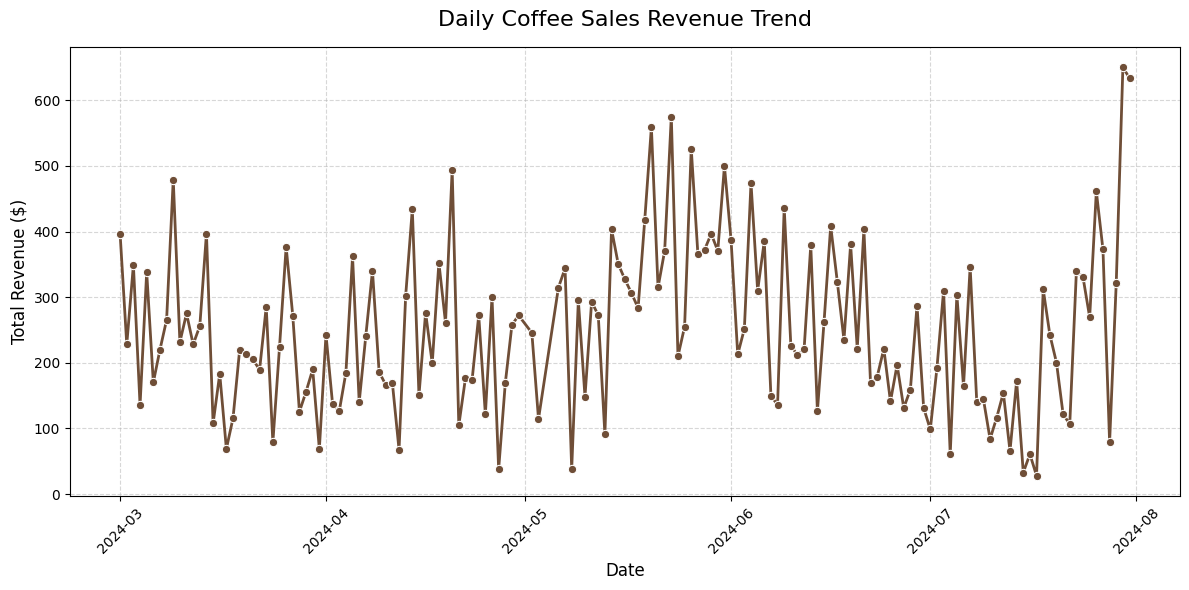

In [16]:
# 3. Create the Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o', color='#6F4E37', linewidth=2)
# 4. Professional Styling
plt.title('Daily Coffee Sales Revenue Trend', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45) # Tilts dates for better readability

plt.tight_layout()
plt.show()